In [ ]:
!pip install h2o

     |████████████████████████████████| 177.0 MB 20 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.1-py2.py3-none-any.whl size=177068062 sha256=fbcb3aea958c8f30da51da1806ebd5decdf7804b9e422826ba9619af5649a6d0
  Stored in directory: /root/.cache/pip/wheels/a6/d9/ab/5442447c7e2ccf07f66aa8b79f3877ce5382f0b95e6c0c797b
Successfully built h2o


In [ ]:
from sklearn.datasets import make_circles
import pandas as pd
X, y = make_circles(n_samples=1000, noise=0.2, factor=0.5, random_state=9)
df = pd.DataFrame(X, columns=['x1','x2'])
df['y'] = y
df.head()
df.to_csv('circle.csv', index=False, header=True)

In [ ]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpm2fsae68
  JVM stdout: /tmp/tmpm2fsae68/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpm2fsae68/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,27 days
H2O_cluster_name:,H2O_from_python_unknownUser_45enk6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
class_df = h2o.import_file("circle.csv",\
                    destination_frame="circle_df")
class_df['y'] = class_df['y'].asfactor()

train_df,valid_df,test_df = class_df.split_frame(ratios=[0.6, 0.2],\
                   seed=133)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
from h2o.automl import H2OAutoML as AutoML
aml = AutoML(max_models = 10, max_runtime_secs=100, seed=2)
aml.train(training_frame= train_df, \
        validation_frame=valid_df, \
        y = 'y', x=['x1','x2'])

AutoML progress: |
06:13:56.745: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_1_AutoML_2_20220511_61356

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.05639448262225793
RMSE: 0.23747522528099205
LogLoss: 0.1911950519379175
Null degrees of freedom: 606
Residual degrees of freedom: 602
Null deviance: 841.4790297525691
Residual deviance: 232.1107930526319
AIC: 242.1107930526319
AUC: 0.9816744832377975
AUCPR: 0.9826583329344181
Gini: 0.963348966475595

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.47149357032172445: 


,,0,1,Error,Rate
0,0,283.0,21.0,0.0691,(21.0/304.0)
1,1,23.0,280.0,0.0759,(23.0/303.0)
2,Total,306.0,301.0,0.0725,(44.0/607.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.471494,0.927152,188.0
1,max f2,0.311703,0.950387,225.0
2,max f0point5,0.726434,0.948738,141.0
3,max accuracy,0.471494,0.927512,188.0
4,max precision,0.998487,1.000000,0.0
5,max recall,0.115336,1.000000,283.0
6,max specificity,0.998487,1.000000,0.0
7,max absolute_mcc,0.471494,0.855041,188.0
8,max min_per_class_accuracy,0.471494,0.924092,188.0
9,max mean_per_class_accuracy,0.471494,0.927507,188.0



Gains/Lift Table: Avg response rate: 49.92 %, avg score: 49.99 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011532,0.996075,2.003300,2.003300,1.000000,0.997295,1.000000,0.997295,0.023102,0.023102,100.330033,100.330033,0.023102
1,2,0.021417,0.995416,2.003300,2.003300,1.000000,0.995595,1.000000,0.996510,0.019802,0.042904,100.330033,100.330033,0.042904
2,3,0.031301,0.994614,2.003300,2.003300,1.000000,0.994880,1.000000,0.995995,0.019802,0.062706,100.330033,100.330033,0.062706
3,4,0.041186,0.994245,2.003300,2.003300,1.000000,0.994342,1.000000,0.995599,0.019802,0.082508,100.330033,100.330033,0.082508
4,5,0.051071,0.993189,2.003300,2.003300,1.000000,0.993565,1.000000,0.995205,0.019802,0.102310,100.330033,100.330033,0.102310
5,6,0.100494,0.990628,2.003300,2.003300,1.000000,0.991902,1.000000,0.993581,0.099010,0.201320,100.330033,100.330033,0.201320
6,7,0.149918,0.986728,2.003300,2.003300,1.000000,0.988659,1.000000,0.991958,0.099010,0.300330,100.330033,100.330033,0.300330
7,8,0.200988,0.981443,2.003300,2.003300,1.000000,0.984044,1.000000,0.989947,0.102310,0.402640,100.330033,100.330033,0.402640
8,9,0.299835,0.938521,1.969912,1.992293,0.983333,0.965531,0.994505,0.981898,0.194719,0.597360,96.991199,99.229319,0.594070
9,10,0.400329,0.774994,1.970459,1.986812,0.983607,0.869357,0.991770,0.953647,0.198020,0.795380,97.045934,98.681226,0.788801




ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.07563334941320102
RMSE: 0.2750151803322882
LogLoss: 0.251286872739174
Null degrees of freedom: 180
Residual degrees of freedom: 176
Null deviance: 250.97578384206275
Residual deviance: 90.96584793158101
AIC: 100.96584793158101
AUC: 0.9610741561961074
AUCPR: 0.972166745366916
Gini: 0.9221483123922147

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33317394055922517: 


,,0,1,Error,Rate
0,0,70.0,12.0,0.1463,(12.0/82.0)
1,1,6.0,93.0,0.0606,(6.0/99.0)
2,Total,76.0,105.0,0.0994,(18.0/181.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.333174,0.911765,104.0
1,max f2,0.303652,0.932540,107.0
2,max f0point5,0.699180,0.942350,87.0
3,max accuracy,0.699180,0.906077,87.0
4,max precision,0.996387,1.000000,0.0
5,max recall,0.020956,1.000000,165.0
6,max specificity,0.996387,1.000000,0.0
7,max absolute_mcc,0.699180,0.818679,87.0
8,max min_per_class_accuracy,0.495009,0.898990,96.0
9,max mean_per_class_accuracy,0.699180,0.911000,87.0



Gains/Lift Table: Avg response rate: 54.70 %, avg score: 54.76 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011050,0.995593,1.828283,1.828283,1.000000,0.996004,1.000000,0.996004,0.020202,0.020202,82.828283,82.828283,0.020202
1,2,0.022099,0.995363,1.828283,1.828283,1.000000,0.995575,1.000000,0.995789,0.020202,0.040404,82.828283,82.828283,0.040404
2,3,0.033149,0.994917,1.828283,1.828283,1.000000,0.995145,1.000000,0.995575,0.020202,0.060606,82.828283,82.828283,0.060606
3,4,0.044199,0.994553,1.828283,1.828283,1.000000,0.994647,1.000000,0.995343,0.020202,0.080808,82.828283,82.828283,0.080808
4,5,0.055249,0.994377,1.828283,1.828283,1.000000,0.994381,1.000000,0.995150,0.020202,0.101010,82.828283,82.828283,0.101010
5,6,0.104972,0.989339,1.828283,1.828283,1.000000,0.991197,1.000000,0.993278,0.090909,0.191919,82.828283,82.828283,0.191919
6,7,0.154696,0.983918,1.828283,1.828283,1.000000,0.986183,1.000000,0.990997,0.090909,0.282828,82.828283,82.828283,0.282828
7,8,0.204420,0.979861,1.828283,1.828283,1.000000,0.981958,1.000000,0.988798,0.090909,0.373737,82.828283,82.828283,0.373737
8,9,0.303867,0.955610,1.828283,1.828283,1.000000,0.968698,1.000000,0.982220,0.181818,0.555556,82.828283,82.828283,0.555556
9,10,0.403315,0.884420,1.726712,1.803238,0.944444,0.920431,0.986301,0.966984,0.171717,0.727273,72.671156,80.323786,0.715078




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.09597350756561955
RMSE: 0.3097959127645482
LogLoss: 0.3152694657207473
Null degrees of freedom: 606
Residual degrees of freedom: 603
Null deviance: 842.0204788102894
Residual deviance: 382.73713138498715
AIC: 390.73713138498715
AUC: 0.9375977071391349
AUCPR: 0.9407574397528503
Gini: 0.8751954142782699

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5428542224941326: 


,,0,1,Error,Rate
0,0,281.0,23.0,0.0757,(23.0/304.0)
1,1,48.0,255.0,0.1584,(48.0/303.0)
2,Total,329.0,278.0,0.117,(71.0/607.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.542854,0.877797,169.0
1,max f2,0.269999,0.899555,240.0
2,max f0point5,0.706938,0.903475,143.0
3,max accuracy,0.542854,0.883031,169.0
4,max precision,0.998016,1.000000,0.0
5,max recall,0.020233,1.000000,374.0
6,max specificity,0.998016,1.000000,0.0
7,max absolute_mcc,0.542854,0.768643,169.0
8,max min_per_class_accuracy,0.433619,0.858086,186.0
9,max mean_per_class_accuracy,0.542854,0.882963,169.0



Gains/Lift Table: Avg response rate: 49.92 %, avg score: 49.87 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011532,0.996141,2.003300,2.003300,1.000000,0.997036,1.000000,0.997036,0.023102,0.023102,100.330033,100.330033,0.023102
1,2,0.021417,0.995643,2.003300,2.003300,1.000000,0.995782,1.000000,0.996457,0.019802,0.042904,100.330033,100.330033,0.042904
2,3,0.031301,0.995333,2.003300,2.003300,1.000000,0.995475,1.000000,0.996147,0.019802,0.062706,100.330033,100.330033,0.062706
3,4,0.041186,0.994618,1.669417,1.923168,0.833333,0.994909,0.960000,0.995850,0.016502,0.079208,66.941694,92.316832,0.075918
4,5,0.051071,0.993691,2.003300,1.938678,1.000000,0.994242,0.967742,0.995539,0.019802,0.099010,100.330033,93.867774,0.095720
5,6,0.100494,0.989099,2.003300,1.970459,1.000000,0.991820,0.983607,0.993710,0.099010,0.198020,100.330033,97.045934,0.194730
6,7,0.149918,0.979770,2.003300,1.981286,1.000000,0.984613,0.989011,0.990711,0.099010,0.297030,100.330033,98.128604,0.293740
7,8,0.200988,0.965395,2.003300,1.986880,1.000000,0.973286,0.991803,0.986283,0.102310,0.399340,100.330033,98.687984,0.396050
8,9,0.299835,0.894789,1.836359,1.937257,0.916667,0.933338,0.967033,0.968829,0.181518,0.580858,83.635864,93.725746,0.561121
9,10,0.400329,0.721996,1.740572,1.887884,0.868852,0.823577,0.942387,0.932367,0.174917,0.755776,74.057242,88.788385,0.709723




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.885597,0.016320,0.895161,0.909091,0.868421,0.877049,0.878261
1,auc,0.937954,0.017699,0.956454,0.944099,0.913713,0.925806,0.949697
2,err,0.114403,0.016320,0.104839,0.090909,0.131579,0.122951,0.121739
3,err_count,13.800000,1.303840,13.000000,12.000000,15.000000,15.000000,14.000000
4,f0point5,0.900575,0.017096,0.917603,0.912052,0.907336,0.889262,0.876623
5,f1,0.881955,0.014851,0.882883,0.903226,0.862385,0.876033,0.885246
6,f2,0.864835,0.030831,0.850694,0.894569,0.821678,0.863192,0.894040
7,lift_top_group,2.002709,0.089382,2.101695,2.095238,1.932203,1.967742,1.916667
8,logloss,0.315381,0.037278,0.267255,0.316413,0.361011,0.340176,0.292047
9,max_per_class_error,0.154922,0.034153,0.169492,0.111111,0.203390,0.145161,0.145455



See the whole table with table.as_data_frame()


In [ ]:
lb = aml.leaderboard

In [ ]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_2_20220511_61356,0.937598,0.315269,0.940757,0.117037,0.309796,0.0959735
StackedEnsemble_AllModels_1_AutoML_2_20220511_61356,0.934905,0.323695,0.932648,0.120348,0.312413,0.0976021
XGBoost_2_AutoML_2_20220511_61356,0.93281,0.322668,0.938299,0.122004,0.313339,0.0981811
XGBoost_3_AutoML_2_20220511_61356,0.932392,0.330866,0.929846,0.130168,0.319367,0.101995
GBM_2_AutoML_2_20220511_61356,0.926839,0.353181,0.923751,0.141713,0.331589,0.109951
XRT_1_AutoML_2_20220511_61356,0.925743,0.546718,0.932139,0.154774,0.331096,0.109625
GBM_3_AutoML_2_20220511_61356,0.923935,0.358691,0.917018,0.143374,0.334959,0.112197
DRF_1_AutoML_2_20220511_61356,0.922535,0.705418,0.921029,0.146669,0.333494,0.111218
GBM_4_AutoML_2_20220511_61356,0.921954,0.36403,0.911036,0.151582,0.336908,0.113507
XGBoost_1_AutoML_2_20220511_61356,0.919142,0.365454,0.928126,0.130227,0.336754,0.113403


In [ ]:
preds = aml.leader.predict(test_df)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_2_20220511_61356


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3938662902106022: 


,,0,1,Error,Rate
0,0,104.0,10.0,0.0877,(10.0/114.0)
1,1,10.0,88.0,0.102,(10.0/98.0)
2,Total,114.0,98.0,0.0943,(20.0/212.0)


# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

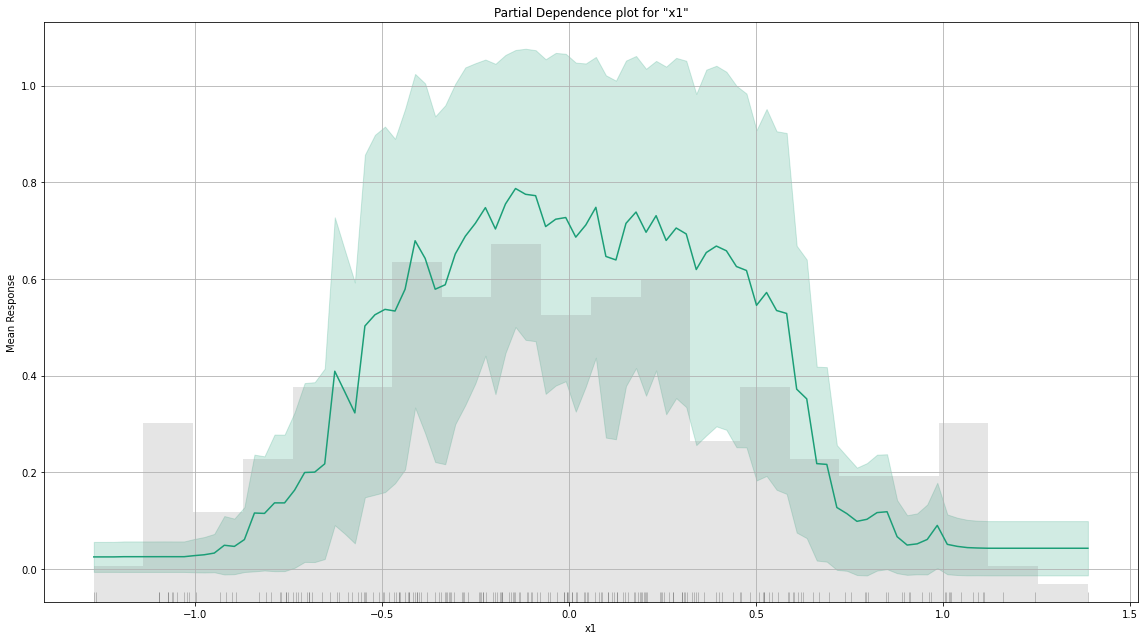

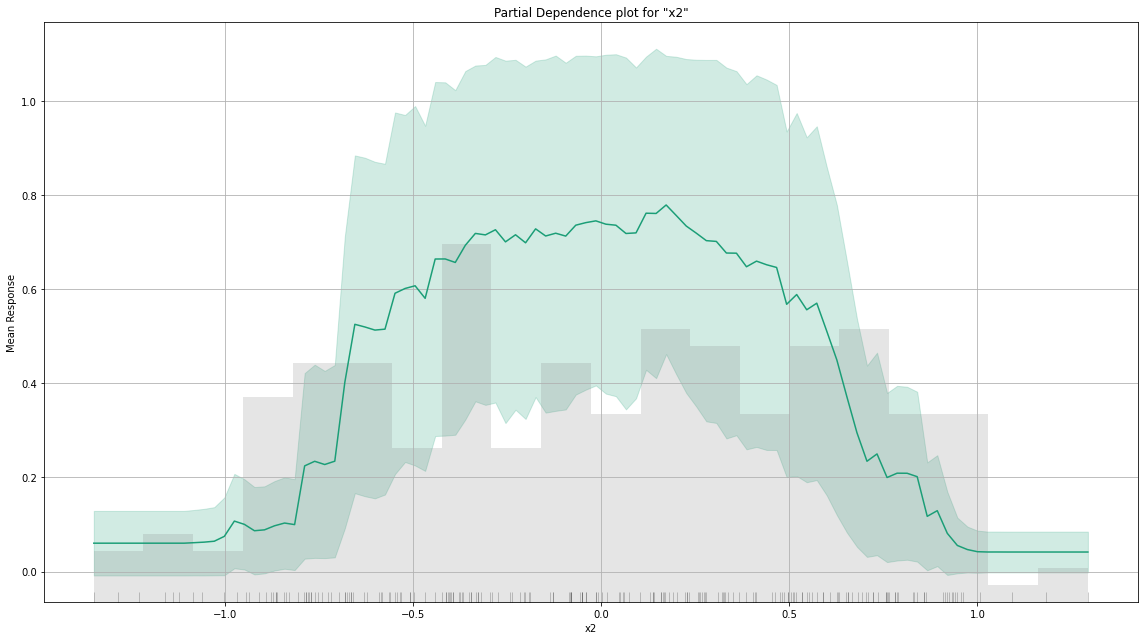

In [ ]:
exa = aml.leader.explain(test_df)

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_1_AutoML_2_20220511_61356,0.937598,0.315269,0.940757,0.117037,0.309796,0.0959735,2267,0.182354,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_2_20220511_61356,0.934905,0.323695,0.932648,0.120348,0.312413,0.0976021,2240,0.128296,StackedEnsemble
XGBoost_2_AutoML_2_20220511_61356,0.93281,0.322668,0.938299,0.122004,0.313339,0.0981811,382,0.05575,XGBoost
XGBoost_3_AutoML_2_20220511_61356,0.932392,0.330866,0.929846,0.130168,0.319367,0.101995,318,0.041687,XGBoost
GBM_2_AutoML_2_20220511_61356,0.926839,0.353181,0.923751,0.141713,0.331589,0.109951,391,0.102989,GBM
XRT_1_AutoML_2_20220511_61356,0.925743,0.546718,0.932139,0.154774,0.331096,0.109625,366,0.085227,DRF
GBM_3_AutoML_2_20220511_61356,0.923935,0.358691,0.917018,0.143374,0.334959,0.112197,310,0.093803,GBM
DRF_1_AutoML_2_20220511_61356,0.922535,0.705418,0.921029,0.146669,0.333494,0.111218,235,0.037496,DRF
GBM_4_AutoML_2_20220511_61356,0.921954,0.36403,0.911036,0.151582,0.336908,0.113507,318,0.058547,GBM
XGBoost_1_AutoML_2_20220511_61356,0.919142,0.365454,0.928126,0.130227,0.336754,0.113403,488,0.026868,XGBoost


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_2_20220511_61356


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3938662902106022: 


,,0,1,Error,Rate
0,0,104.0,10.0,0.0877,(10.0/114.0)
1,1,10.0,88.0,0.102,(10.0/98.0)
2,Total,114.0,98.0,0.0943,(20.0/212.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

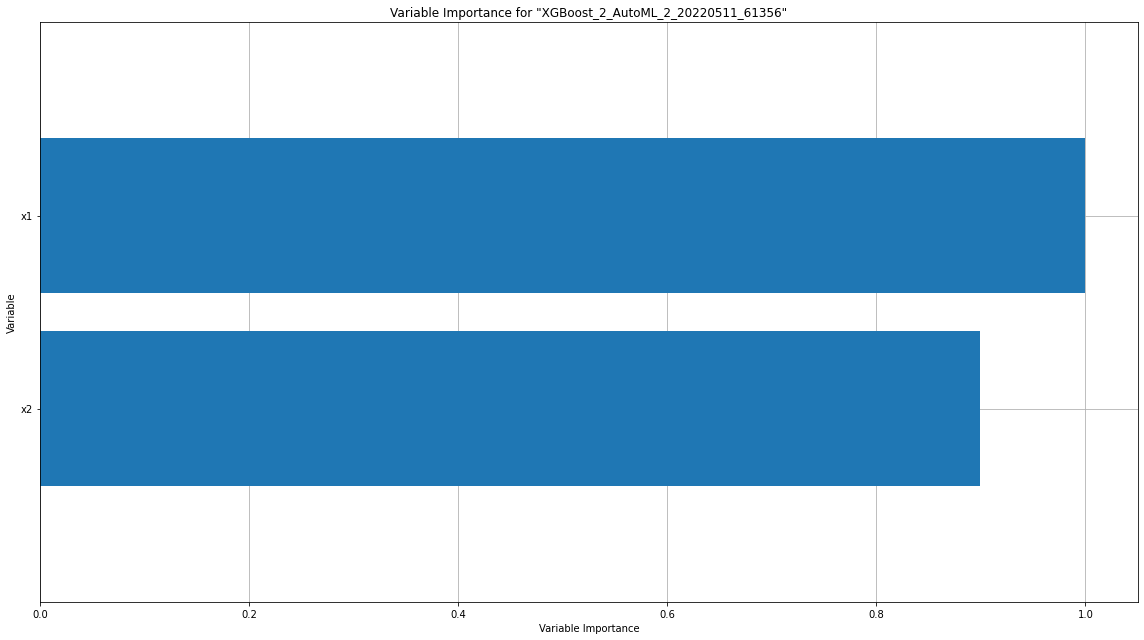

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

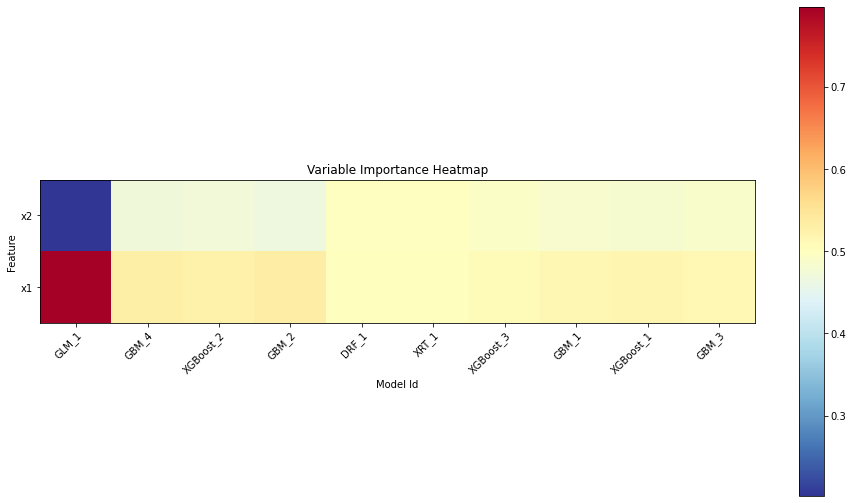

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

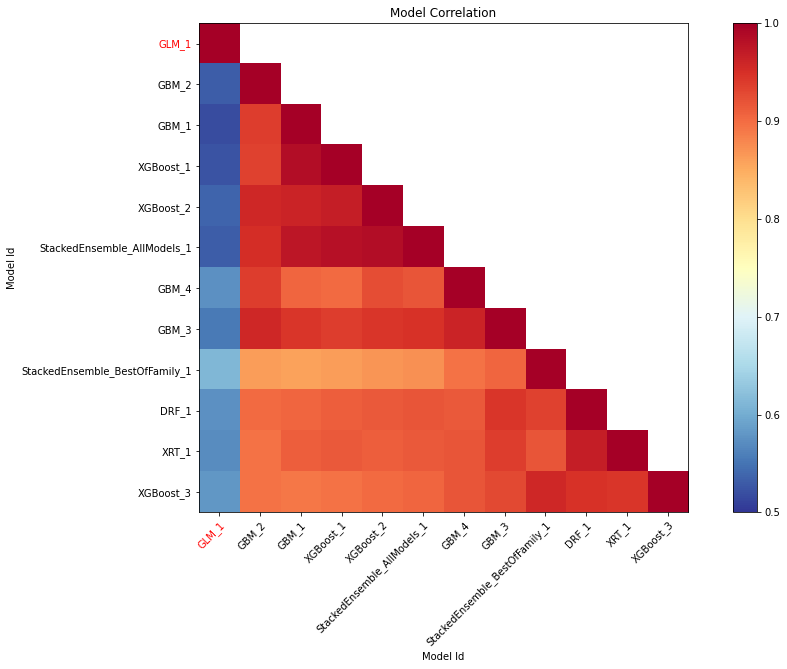

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

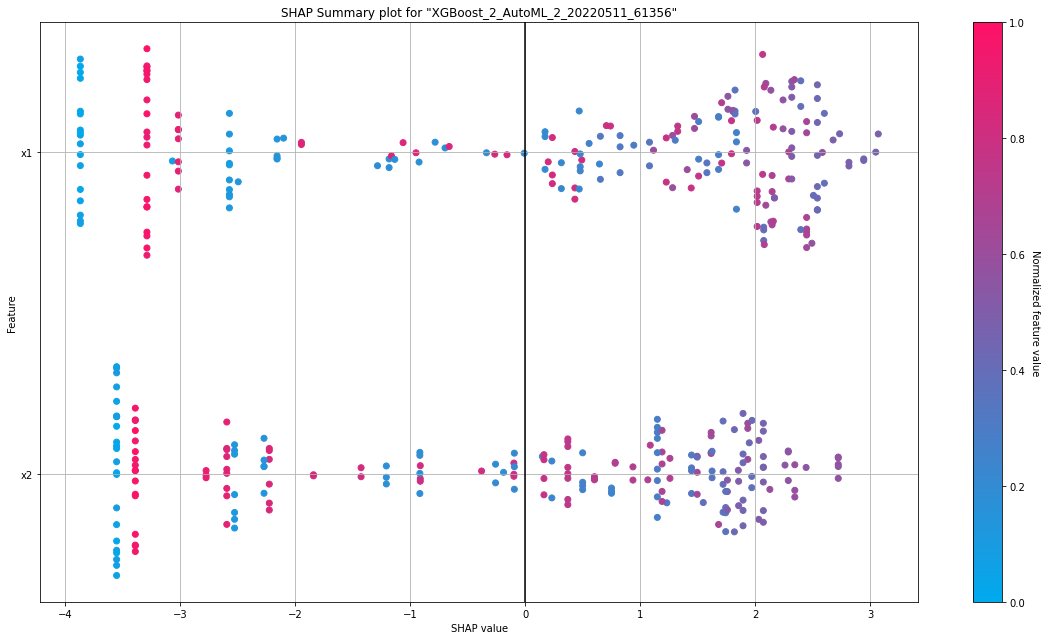

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

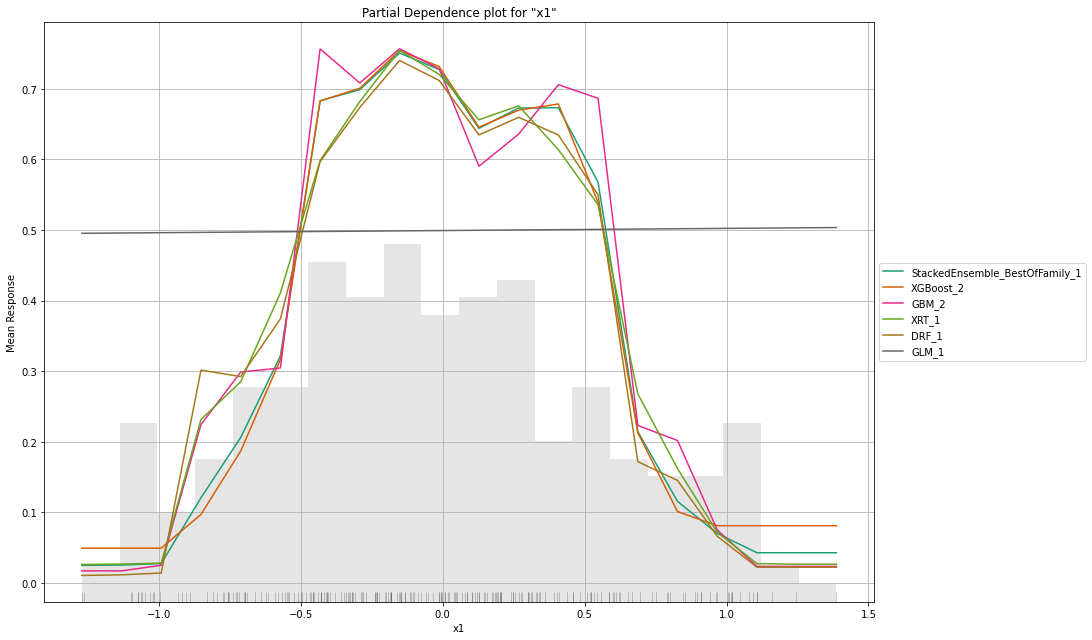

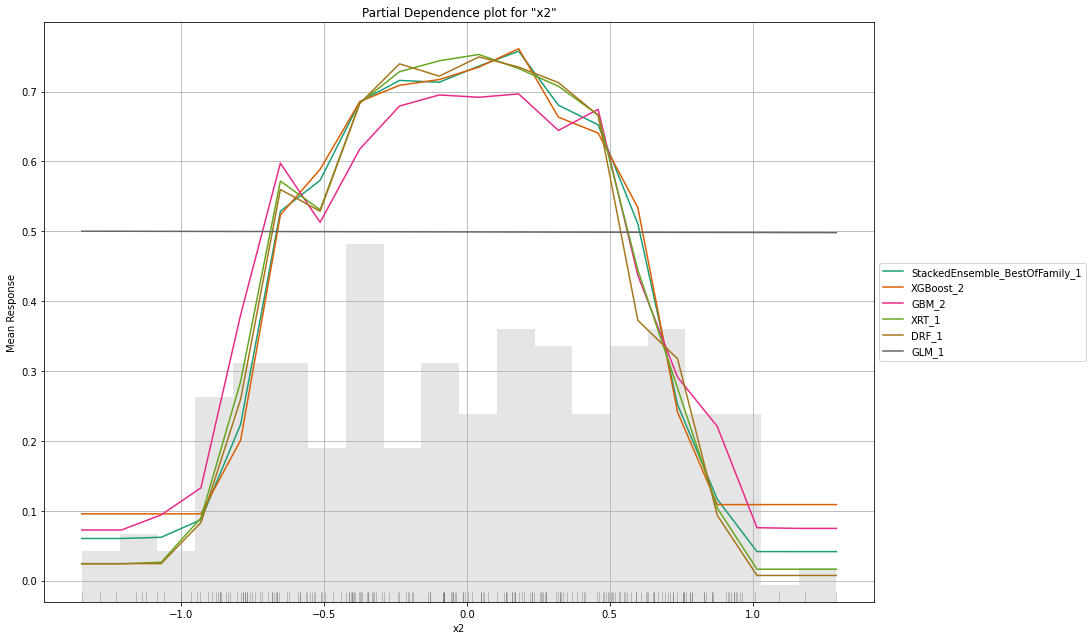

In [ ]:
exa = aml.explain(test_df)